In [1]:
import tensorflow as tf
import numpy as np
import os

physical_devices = tf.config.list_physical_devices('GPU')
try:
	tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
	print('Could not set GPU memory growth')
	pass


#config.gpu_options.per_process_gpu_memory_fraction=0.7
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=x)
#tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
#session = tf.compat.v1.InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
andrea = "./"
giaco = "/content/drive/MyDrive/DLA/"
path = andrea

In [59]:
Blinks = np.load(os.path.join(path,'npy/Blinks_F3.npy'))
Labels = np.load(os.path.join(path,'npy/Labels_F3.npy'))
Labels[Labels==10]=1

In [50]:
BlinksTest3 = np.load(os.path.join(path,'npy/BlinksTest_F3.npy'))
LabelsTest3 = np.load(os.path.join(path,'npy/LabelsTest_F3.npy'))
LabelsTest3[LabelsTest3==10]=1
    #deciding the indices of each video based on the fold

In [5]:
del Blinks, Labels, BlinksTest, LabelsTest

In [33]:
def get_custom_test_sets():
    BlinksTest = [np.load('./test_sets/TestSetBlinksSlice1'),
                  np.load('./test_sets/TestSetBlinksSlice2'),
                  np.load('./test_sets/TestSetBlinksSlice3'),
                  np.load('./test_sets/TestSetBlinksSlice4'),
                  np.load('./test_sets/TestSetBlinksSlice5')]

    TestLabels = [np.load('./test_sets/TestSetLabelsSlice1'),
                  np.load('./test_sets/TestSetLabelsSlice2'),
                  np.load('./test_sets/TestSetLabelsSlice3'),
                  np.load('./test_sets/TestSetLabelsSlice4'),
                  np.load('./test_sets/TestSetLabelsSlice5')]
    return  BlinksTest, TestLabels

In [ ]:
def get_test_set(fold_label):
    B, L, Bt, Lb = create_Dataset(fold_label)
    return Bt, Lb

In [3]:
def create_Dataset(Fold):   #####################Normalizing the input#############Second phase
    Blinks = np.load(os.path.join(path,'npy/Blinks_'+Fold+'.npy'))
    Labels = np.load(os.path.join(path,'npy/Labels_'+Fold+'.npy'))
    BlinksTest = np.load(os.path.join(path,'npy/BlinksTest_'+Fold+'.npy'))
    LabelsTest = np.load(os.path.join(path,'npy/LabelsTest_'+Fold+'.npy'))
    BlinksTest[:,:,0]=(BlinksTest[:,:,0]-np.mean(Blinks[:,:,0]))/np.std(Blinks[:,:,0])
    Blinks[:,:,0]=(Blinks[:,:,0]-np.mean(Blinks[:,:,0]))/np.std(Blinks[:,:,0])
        #####
        #####
    BlinksTest[:,:,1]=(BlinksTest[:,:,1]-np.mean(Blinks[:,:,1]))/np.std(Blinks[:,:,1])
    Blinks[:,:,1]=(Blinks[:,:,1]-np.mean(Blinks[:,:,1]))/np.std(Blinks[:,:,1])
        #####
    BlinksTest[:,:,2]=(BlinksTest[:,:,2]-np.mean(Blinks[:,:,2]))/np.std(Blinks[:,:,2])
    Blinks[:,:,2]=(Blinks[:,:,2]-np.mean(Blinks[:,:,2]))/np.std(Blinks[:,:,2])
        #####
    BlinksTest[:,:,3]=(BlinksTest[:,:,3]-np.mean(Blinks[:,:,3]))/np.std(Blinks[:,:,3])
    Blinks[:,:,3]=(Blinks[:,:,3]-np.mean(Blinks[:,:,3]))/np.std(Blinks[:,:,3])
    LabelsTest[LabelsTest==10] = 1
    Labels[Labels==10] = 1
    return Blinks,Labels, BlinksTest, LabelsTest
    ####
    ####JUST TO DOUBLE CHECK
    ####
    # print(np.mean(Blinks[:,:,0]),np.mean(Blinks[:,:,1]),np.mean(Blinks[:,:,2]),np.mean(Blinks[:,:,3]))
    # print(np.std(Blinks[:,:,0]),np.std(Blinks[:,:,1]),np.std(Blinks[:,:,2]),np.std(Blinks[:,:,3]))
    # print(np.mean(BlinksTest[:,:,0]),np.mean(BlinksTest[:,:,1]),np.mean(BlinksTest[:,:,2]),np.mean(BlinksTest[:,:,3]))
    # print(np.std(BlinksTest[:,:,0]),np.std(BlinksTest[:,:,1]),np.std(BlinksTest[:,:,2]),np.std(BlinksTest[:,:,3]))
def custom_test(file, labels):
    Blinks = np.load(file)
    Labels = np.load(labels)
    Blinks[:,:,0]=(Blinks[:,:,0]-np.mean(Blinks[:,:,0]))/np.std(Blinks[:,:,0])
    Blinks[:,:,1]=(Blinks[:,:,1]-np.mean(Blinks[:,:,1]))/np.std(Blinks[:,:,1])
    Blinks[:,:,2]=(Blinks[:,:,2]-np.mean(Blinks[:,:,2]))/np.std(Blinks[:,:,2])
    Blinks[:,:,3]=(Blinks[:,:,3]-np.mean(Blinks[:,:,3]))/np.std(Blinks[:,:,3])
    Labels[Labels==10] = 1 #abs(1-Labels)
    return Blinks, Labels

In [4]:
def create_Dataset_auto_split(testOnly=False):
    def unison_shuffled_copies(a, b):
        p = np.random.permutation(len(a))
        return a[p], b[p]
    Blinks = np.load(os.path.join(path,'npy/Blinks_Full.npy'))
    Labels = np.load(os.path.join(path,'npy/Labels_Full.npy'))
    Blinks[:,:,0]=(Blinks[:,:,0]-np.mean(Blinks[:,:,0]))/np.std(Blinks[:,:,0])
    Blinks[:,:,1]=(Blinks[:,:,1]-np.mean(Blinks[:,:,1]))/np.std(Blinks[:,:,1])
    Blinks[:,:,2]=(Blinks[:,:,2]-np.mean(Blinks[:,:,2]))/np.std(Blinks[:,:,2])
    Blinks[:,:,3]=(Blinks[:,:,3]-np.mean(Blinks[:,:,3]))/np.std(Blinks[:,:,3])
    Labels[Labels==10] = 1
    step = (len(Blinks)//5)
    B, L, BT, LT = [],[],[],[]
    BlinksShuffled, LabelsShuffled = unison_shuffled_copies(Blinks, Labels)
    indexes = set(list(range(len(Blinks))))
    for i in range(5):
        if i < 4:
            LT.append(LabelsShuffled[i*step:(i+1)*step])
            BT.append(BlinksShuffled[i*step:(i+1)*step])
            B.append(BlinksShuffled[list(indexes.difference(list(range(i*step,(i+1)*step))))])
            L.append(LabelsShuffled[list(indexes.difference(list(range(i*step,(i+1)*step))))])
        else:
            LT.append(LabelsShuffled[i*step:])
            BT.append(BlinksShuffled[i*step:])
            B.append(BlinksShuffled[:i*step])
            L.append(LabelsShuffled[:i*step])

    return B,L, BT, LT

In [18]:
B, L = custom_test("npy/Blinks_Full.npy", "npy/Labels_Full.npy")
print(str(sum(L==1)))
print(str(sum(L==0)))

[5896]
[4315]


In [5]:
def create_model(model_name):
    if model_name == 'LSTMreza':
      input = tf.keras.Input(shape=(30, 4))
      x = tf.keras.layers.Dense(64, activation='relu')(input)
      x = tf.keras.layers.Masking(mask_value=0.0)(x)
      x = tf.keras.layers.LSTM(32,
                               recurrent_activation='sigmoid',
                               #batch_input_shape=(64, 30,64),
                               recurrent_dropout=0,
                               unroll=False,
                               use_bias=True,
                               return_sequences=False,
                               dropout=0.1)(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dense(8, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      y = tf.keras.layers.Dense(1, activation='tanh')(x)
      model = tf.keras.models.Model(inputs=[input], outputs=[y])
    elif model_name == 'LSTM':
      input = tf.keras.Input(shape=(30, 4))
      x = tf.keras.layers.Dense(128, activation='relu')(input)
      x = tf.keras.layers.Masking(mask_value=0.0)(input)
      x = tf.keras.layers.LSTM(64,
                               recurrent_activation='sigmoid',
                               #batch_input_shape=(64, 30,64),
                               recurrent_dropout=0,
                               unroll=False,
                               use_bias=True,
                               return_sequences=False,
                               dropout=0.1)(x)
      x = tf.keras.layers.Dense(32, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      y = tf.keras.layers.Dense(1, activation='tanh')(x)
      model = tf.keras.models.Model(inputs=[input], outputs=[y])
    elif model_name == 'stackedreza':
      input = tf.keras.Input(shape=(30, 4))
      x = tf.keras.layers.Dense(128, activation='relu')(input)
      x = tf.keras.layers.Masking(mask_value=0.0)(x)
      #rnn_cells = [tf.keras.layers.LSTMCell(36, dropout=0.1, recurrent_dropout=0.1) for _ in range(4)]
      #stacked_lstm = tf.keras.layers.StackedRNNCells(rnn_cells)
      #x = tf.keras.layers.RNN(stacked_lstm, return_sequences=False)(x)
      x = tf.keras.layers.LSTM(32, recurrent_activation='sigmoid',
                               #batch_input_shape=(64, 30,64),
                               recurrent_dropout=0,
                               unroll=False,
                               use_bias=True,
                               return_sequences=False,
                               dropout=0.1)(x)
      x = tf.keras.layers.Dense(32, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dense(8, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      y = tf.keras.layers.Dense(1, activation='tanh')(x)
      model = tf.keras.models.Model(inputs=[input], outputs=[y])
    elif model_name == 'giaco':
      input = tf.keras.Input(shape=(30, 4))
      x = tf.keras.layers.Dense(128, activation='relu')(input)
      x = tf.keras.layers.Masking(mask_value=0.0)(x)
      #rnn_cells = [tf.keras.layers.LSTMCell(36, dropout=0.1, recurrent_dropout=0.1) for _ in range(4)]
      #stacked_lstm = tf.keras.layers.StackedRNNCells(rnn_cells)
      #x = tf.keras.layers.RNN(stacked_lstm, return_sequences=False)(x)
      x = tf.keras.layers.LSTM(64, recurrent_activation='sigmoid',
                               #batch_input_shape=(64, 30,64),
                               recurrent_dropout=0,
                               unroll=False,
                               use_bias=True,
                               return_sequences=False,
                               dropout=0.1)(x)
      x = tf.keras.layers.Dense(128, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Dense(64, activation='relu')(x)
      x = tf.keras.layers.Dense(32, activation='relu')(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dense(8, activation='relu')(x)
      y = tf.keras.layers.Dense(1, activation='tanh')(x)
      model = tf.keras.models.Model(inputs=[input], outputs=[y])
    elif model_name == 'giaco2':
      input = tf.keras.Input(shape=(30, 4))
      x = tf.keras.layers.Dense(64, activation='relu')(input)
      x = tf.keras.layers.Masking(mask_value=0.0)(x)
      x = tf.keras.layers.LSTM(32, recurrent_activation='sigmoid',
                               #batch_input_shape=(64, 30,64),
                               recurrent_dropout=0,
                               unroll=False,
                               use_bias=True,
                               return_sequences=False,
                               dropout=0.1)(x)
      x = tf.keras.layers.Dense(64, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Dense(32, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Dense(16, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Dense(8, activation='relu')(x)
      x = tf.keras.layers.Dropout(0.1)(x)
      y = tf.keras.layers.Dense(1, activation='sigmoid')(x)
      model = tf.keras.models.Model(inputs=[input], outputs=[y])
    else:
      print("Chiama le cose con il loro nome")
    return model

In [284]:
model_name = "giaco"
model = create_model(model_name)

In [285]:
model.summary()

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 30, 4)]           0         
_________________________________________________________________
dense_228 (Dense)            (None, 30, 128)           640       
_________________________________________________________________
masking_57 (Masking)         (None, 30, 128)           0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_229 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_230 (Dense)            (None, 64)                825

In [287]:
lr = 0.00053
bs = 128
ep = 100
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
)

In [288]:
#model.fit(x= Blinks, y = Labels, validation_data=(BlinksTest, LabelsTest), epochs=ep, batch_size=bs, callbacks=my_callbacks)

43/61 [====================>.........] - ETA: 2s - loss: 0.6433 - accuracy: 0.6074

KeyboardInterrupt: ignored

In [283]:
del model

## Ensembled

In [ ]:
#flags
save_model = True

In [5]:
def create_models():
    models = []
    models.append(create_model('giaco'))
    models.append(create_model('LSTMreza'))
    models.append(create_model('giaco2'))
    return models


In [6]:
#dictionary of parameters for every net [ep, bs, lr]
def get_models_parameters():
    model1_parameters = {'name': 'giaco', 'ep': 100, 'bs': 128, 'lr': 0.00053}
    model2_parameters = {'name': 'LSTMreza','ep': 80, 'bs': 64, 'lr': 0.00053}
    model3_parameters = {'name': 'giaco2','ep': 200, 'bs': 64, 'lr': 0.000053}
    parameters = []
    parameters.append(model1_parameters)
    parameters.append(model2_parameters)
    parameters.append(model3_parameters)
    return parameters

In [8]:
def fit_models(models, parameters, ds, fold):
    Blinks, Labels, BlinksTest, LabelsTest = ds
    weight_for_0 = sum(Labels==1)/len(Labels.flatten())#num_pneumonia / (num_normal + num_pneumonia)
    weight_for_1 = sum(Labels==0)/len(Labels.flatten())#num_normal / (num_normal + num_pneumonia)
    class_weigths = {0: weight_for_0, 1: weight_for_1}
    for i in range(len(models)):
      name = parameters[i]['name']
      lr = parameters[i]['lr']
      bs = parameters[i]['bs']
      ep = parameters[i]['ep']
      filename = './models/BatchNormalized/' + fold + str(name) + 'ep=' + str(ep) + 'bs=' + str(bs) + 'lr=' + str(lr) +".h5"
      lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
            initial_learning_rate=lr,
            decay_steps=(len(Labels)//bs)*1000,
            decay_rate=1,
            staircase=False)
      models[i].compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy']
      )
      my_callbacks = [tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', save_best_only=True)]
      print("Training: " + name)
      models[i].fit(x= Blinks, y = Labels, validation_data=(BlinksTest, LabelsTest), class_weight=class_weigths, epochs=ep, batch_size=bs, callbacks=my_callbacks)


In [35]:
#to check
def predict_all(models, test_set):
    labels = []
    for m in models:
        labels.append(m.predict(test_set).flatten())
    return  np.asarray(labels).transpose()

In [37]:
def ensemble(predictions):
    ensemble = predictions.mean(axis=1)
    ensemble[ensemble<=0.5]=0
    ensemble[ensemble>0.5]=1
    return ensemble


In [38]:
def compute_accuracy(true_labels, predicted_labels):
    acc = (sum(predicted_labels.flatten()==true_labels.flatten())/len(predicted_labels))*100
    print("Ensemble Accuracy: %2.4f" %acc + "%")
    return acc


In [9]:
Folds = ["Slice1","Slice2","Slice3","Slice4","Slice5"]

def train_5fold_models():
    models = []
    del models
    datasets = create_Dataset_auto_split()
    for i, fold in enumerate(Folds):
        print("Training on " + fold)
        #ds = create_Dataset(fold)
        ds = datasets[0][i],datasets[1][i],datasets[2][i],datasets[3][i]
        models = create_models()
        parameters = get_models_parameters()
        fit_models(models, parameters, ds, fold)
        del models
        models = []
        np.save(open("./test_sets/BatchNormalization/TestSetBlinks"+fold,'wb'),ds[2])
        np.save(open("./test_sets/BatchNormalization/TestSetLabels"+fold,'wb'),ds[3])

In [10]:
train_5fold_models()

Training on Slice1
Training: giaco
Epoch 1/100
64/64 [==============================] - 2s 24ms/step - loss: 0.3414 - accuracy: 0.6001 - val_loss: 0.5918 - val_accuracy: 0.6572
Epoch 2/100
64/64 [==============================]

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrices(true, pred, slice):
    tn, fp, fn, tp = confusion_matrix(true, pred,labels=[0, 1]).ravel()
    array = [[tp, fp], [fn, tn]]
    df_cm = pd.DataFrame(array, index = ["Pred Alert", "Pred Sleepy"],
                      columns = ["True Alert", "True Sleepy"])
    plt.figure(figsize = (10,7))
    fig = sn.heatmap(df_cm, annot=True, fmt="d")
    fig.get_figure().savefig('/home/andrea/Scrivania/confMatSlice+'+str(slice) +'.png', dpi=400)

def five_fold_cross_validation(models_path):
    models = os.listdir(models_path)
    f1models, f2models, f3models, f4models, f5models = [],[],[],[],[]
    TB,TL = get_custom_test_sets()
    f1train,f2train,f3train,f4train,f5train = (TB[0],TL[0]),(TB[1],TL[1]),(TB[2],TL[2]),(TB[3],TL[3]),(TB[4],TL[4])
    for model in models:
        if "Slice1" in model:
            f1models.append(tf.keras.models.load_model(os.path.join(models_path,model)))
        if "Slice2" in model:
            f2models.append(tf.keras.models.load_model(os.path.join(models_path,model)))
        if "Slice3" in model:
            f3models.append(tf.keras.models.load_model(os.path.join(models_path,model)))
        if "Slice4" in model:
            f4models.append(tf.keras.models.load_model(os.path.join(models_path,model)))
        if "Slice5" in model:
            f5models.append(tf.keras.models.load_model(os.path.join(models_path,model)))
    splitted_models = [ f1models, f2models, f3models, f4models, f5models]
    test_sets = [f1train, f2train, f3train, f4train, f5train]
    accuracies = np.zeros(len(splitted_models))
    for index, test in enumerate(splitted_models):
        labels = predict_all(test, test_sets[index][0])
        ens = ensemble(labels)
        acc = compute_accuracy((test_sets[index][1]).flatten(), ens)
        confusion_matrices((test_sets[index][1]).flatten(), ens, index)
        accuracies[index] = acc
    print("Average accuracy is: %2.4f" %accuracies.mean(axis=0) + "%")

Ensemble Accuracy: 93.0950%
Ensemble Accuracy: 93.0460%
Ensemble Accuracy: 94.3683%
Ensemble Accuracy: 93.0950%
Ensemble Accuracy: 96.3289%
Average accuracy is: 93.9866%


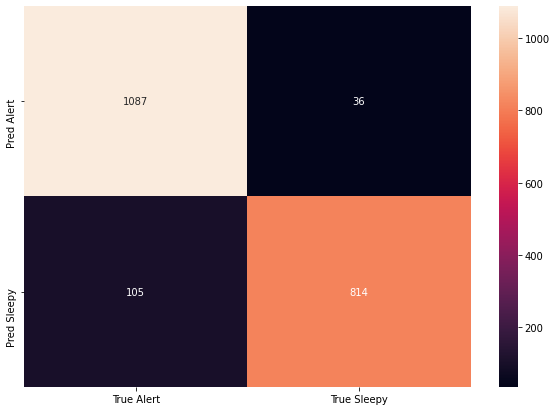

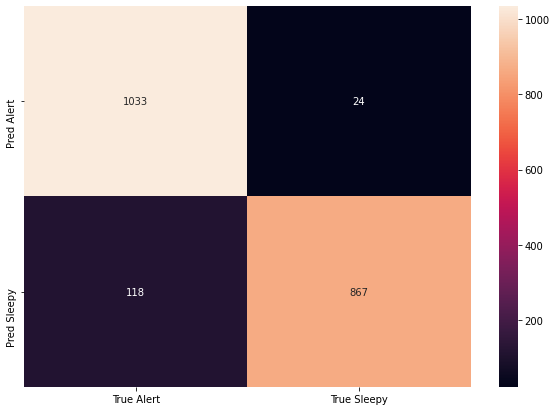

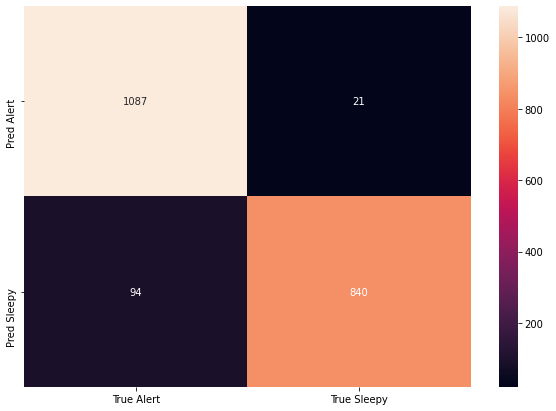

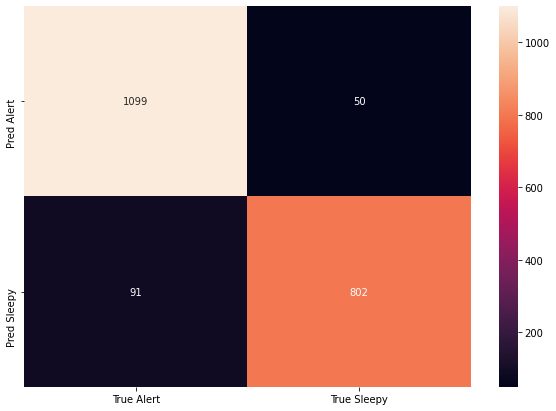

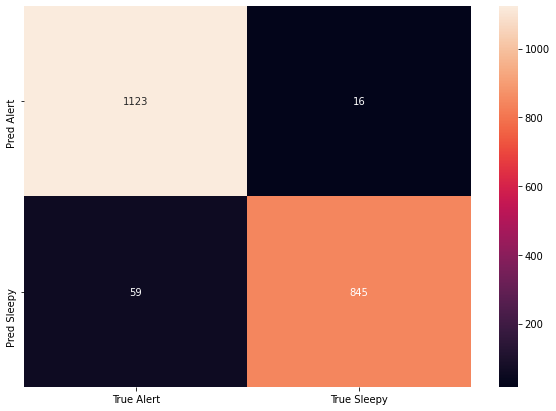

In [44]:
five_fold_cross_validation("./models")

In [41]:
models = []
models.append(tf.keras.models.load_model('./models/Slice1LSTMrezaep=80bs=64lr=0.00053.h5'))
models.append(tf.keras.models.load_model('./models/Slice1giaco2ep=200bs=64lr=5.3e-05.h5'))
models.append(tf.keras.models.load_model('./models/Slice1giacoep=100bs=128lr=0.00053.h5'))

In [42]:
Bt, Lt = custom_test("./giacoBlinks","./giacoLabels")
ypred = predict_all(models, Bt)
ypred[ypred<=0.5]=0
ypred[ypred>0.5]=1
ens =  ensemble(ypred)
acc = compute_accuracy(Lt, ens)

Ensemble Accuracy: 22.6415%


In [48]:
for i, model in enumerate(models):
    print("Model %d" %i)
    model.summary()


Model 0
Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 30, 4)]           0         
_________________________________________________________________
dense_115 (Dense)            (None, 30, 64)            320       
_________________________________________________________________
masking_19 (Masking)         (None, 30, 64)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_116 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_43 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 16)      

In [57]:
ens =  ensemble(labels)

In [61]:
acc = compute_accuracy(LabelsTest, ens)

KeyboardInterrupt: 

In [25]:

model = create_model("LSTMreza")
B,L,Bt,Lt = create_Dataset("F4")

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000053),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.fit(x=B, y=L, validation_data=(Bt,Lt), epochs=80, batch_size=64)

Epoch 1/80
121/121 [==============================] - 11s 95ms/step - loss: 3.1746 - accuracy: 0.3647 - val_loss: 1.2461 - val_accuracy: 0.6173

In [6]:
model = tf.keras.models.load_model('./models/Slice1giaco2ep=200bs=64lr=5.3e-05.h5')
#model.evaluate(x=BlinksTest3, y=LabelsTest3.flatten())

In [ ]:
model.evaluate(x=Bt, y=Lt)

In [9]:
ypred[ypred<=0.5]=0
ypred[ypred>0.5]=1

In [12]:
acc = compute_accuracy(Lt, ypred)

Ensemble Accuracy: 22.6415%


In [10]:

inp = B[:64,:,:]
x = tf.keras.layers.Dense(64, activation='relu', dtype=tf.float64)(inp)

In [73]:
i = list(range(1553))
v = [3,4,5]
setA = set(i)
setB = set(v)
onlyInA = list(setA.difference(v))

In [75]:
# Get new set with elements that are only in a but not in b